#📌 Extracción

In [ ]:
#Se importan las bibliotecas iniciales  necesarias para el desafio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker


In [ ]:
ruta_archivo='https://raw.githubusercontent.com/VillaltaE/netflix_churn/refs/heads/main/netflix_customer_churn.csv'
df = pd.read_csv(ruta_archivo)


In [ ]:
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [ ]:
df.sample(5)

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
4748,762bdb2f-9869-459d-a388-b7d7499de3d1,24,Female,Standard,30.63,58,Oceania,Mobile,13.99,0,Debit Card,4,0.52,Sci-Fi
4161,dc9be9a8-e518-4f3c-a023-bdbaeeb17b3c,53,Other,Standard,0.51,30,South America,Mobile,13.99,0,Debit Card,5,0.02,Horror
4360,24798db7-c1a2-4e80-9275-ae9b143dace7,28,Other,Basic,12.94,40,Europe,Mobile,8.99,1,PayPal,3,0.32,Comedy
3992,a7ffdf22-b673-4b5a-aed8-8c53ed42814d,22,Other,Premium,32.25,30,Africa,TV,17.99,0,Gift Card,2,1.04,Romance
3917,32c2a5bc-7e17-4fe3-85f0-b00105dde7dc,47,Male,Premium,7.42,47,Africa,Tablet,17.99,1,Crypto,4,0.15,Horror


#📊 Carga y análisis

In [ ]:
#Informacion general del data frame, para conocer los tipo de datos y cuantos son nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [6]:
# Copmprobando si hay los valores nulos
print(df.isnull().sum())

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64


In [7]:
Columns = df.columns
print(Columns)

Index(['customer_id', 'age', 'gender', 'subscription_type', 'watch_hours',
       'last_login_days', 'region', 'device', 'monthly_fee', 'churned',
       'payment_method', 'number_of_profiles', 'avg_watch_time_per_day',
       'favorite_genre'],
      dtype='object')


In [15]:
#Numero de columnas
df.shape[1]

14

In [16]:
#Numero de filas
df.shape[0]

5000

In [8]:
#Se elimina 'customer_id' no se usará en el análisis
df = df.drop(['customer_id'],axis=1)
df.head()

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [ ]:
# Se crea la columna watch_hour_per_profiles
df['watch_hour_per_profile'] = round(df['watch_hours'] / df['number_of_profiles'],2)

In [48]:
# Se crea la columna avg_watch_time_per_day_profile
df['avg_watch_time_per_day_profile'] =round(df['watch_hour_per_profile']/(df['last_login_days']+1),2)

In [49]:
#Se verifica la ceracion de las columnas anterioriores
df.sample(5)

,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,watch_hour_per_profile,avg_watch_time_per_day_profile
3170,29,Male,Premium,1.61,59,North America,Desktop,17.99,1,Credit Card,2,0.03,Horror,0.80,0.01
3898,60,Female,Premium,15.94,4,South America,Desktop,17.99,0,PayPal,3,3.19,Action,5.31,1.06
4869,40,Male,Standard,1.11,20,Europe,Tablet,13.99,1,PayPal,1,0.05,Horror,1.11,0.05
1525,65,Female,Standard,18.34,48,Europe,Mobile,13.99,1,Debit Card,1,0.37,Action,18.34,0.37
4993,23,Other,Standard,3.10,12,Europe,Laptop,13.99,1,Crypto,5,0.24,Comedy,0.62,0.05


In [51]:
# Relación churn = 1 respecto chrun = 0
df['churned'].value_counts(normalize=True)

churned
1    0.503
0    0.497
Name: proportion, dtype: float64

In [53]:
#Numero de churn =  1
df['churned'].value_counts()


churned
1    2515
0    2485
Name: count, dtype: int64

In [54]:
# Analisis de los usuarios que se salieron
df_si_churned = df[df['churned'] == 1].copy()

In [55]:
# Analisis de los usuarios que se salieron
df_si_churned.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day,watch_hour_per_profile,avg_watch_time_per_day_profile
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.0,2515.000000,2515.000000,2515.000000,2515.000000
mean,43.793241,5.918497,38.309344,13.125189,1.0,2.801193,0.164048,3.041185,0.087662
std,15.472773,5.418978,14.751904,3.764869,0.0,1.383301,0.186164,3.940499,0.166192
min,18.000000,0.010000,0.000000,8.990000,1.0,1.000000,0.000000,0.000000,0.000000
25%,30.000000,1.830000,30.000000,8.990000,1.0,2.000000,0.060000,0.630000,0.020000
50%,44.000000,4.060000,41.000000,13.990000,1.0,3.000000,0.120000,1.590000,0.050000
75%,57.000000,8.710000,50.000000,17.990000,1.0,4.000000,0.230000,3.905000,0.100000
max,70.000000,41.330000,60.000000,17.990000,1.0,5.000000,4.320000,41.330000,4.320000


In [56]:
# Analisis de los usuarios que no se salieron
df_no_churned = df[df['churned'] == 0].copy()

In [57]:
# Analisis de los usuarios que no se salieron
df_no_churned.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day,watch_hour_per_profile,avg_watch_time_per_day_profile
count,2485.000000,2485.000000,2485.000000,2485.000000,2485.0,2485.000000,2485.000000,2485.000000,2485.000000
mean,43.902213,17.449590,21.771026,14.248350,0.0,3.250302,1.594133,7.421453,0.716286
std,15.532694,13.923952,16.155030,3.528817,0.0,1.412834,3.570493,8.406106,1.672795
min,18.000000,0.010000,0.000000,8.990000,0.0,1.000000,0.000000,0.000000,0.000000
25%,30.000000,7.380000,9.000000,8.990000,0.0,2.000000,0.400000,2.260000,0.120000
50%,44.000000,13.860000,19.000000,13.990000,0.0,3.000000,0.720000,4.760000,0.250000
75%,58.000000,24.020000,30.000000,17.990000,0.0,4.000000,1.460000,9.080000,0.660000
max,70.000000,110.400000,60.000000,17.990000,0.0,5.000000,98.420000,81.070000,26.400000


In [26]:
#Datos de gender de los que se fueron
#no_churn.groupby('InternetService')['InternetService'].count()
yes_churn.groupby('gender')['gender'].count()  # se van mas mujeres respecto a los otros generos

gender
Female    874
Male      827
Other     814
Name: gender, dtype: int64

In [27]:
#Datos de gender de los que se no se fueron

no_churn.groupby('gender')['gender'].count() # se van mas mujeres respecto a los otros generos

gender
Female    837
Male      827
Other     821
Name: gender, dtype: int64

In [28]:
#Agrupando por tipo de subscripcion de los que se van
yes_churn.groupby('subscription_type')['subscription_type'].count()

subscription_type
Basic       1027
Premium      740
Standard     748
Name: subscription_type, dtype: int64

In [79]:
#Agrupando por tipo de subscripcion de los que no se van
no_churn.groupby('subscription_type')['subscription_type'].count()

subscription_type
Basic       634
Premium     953
Standard    898
Name: subscription_type, dtype: int64

In [29]:
#Agrupando por tipo de region de los que se van
yes_churn.groupby('region')['region'].count()

region
Africa           388
Asia             426
Europe           448
North America    421
Oceania          383
South America    449
Name: region, dtype: int64

In [30]:
#Agrupando por tipo de region de los que no se van
no_churn.groupby('region')['region'].count()

region
Africa           415
Asia             415
Europe           419
North America    430
Oceania          382
South America    424
Name: region, dtype: int64

In [31]:
#Agrupando por tipo de device(equipo) de los que se van
yes_churn.groupby('device')['device'].count()

device
Desktop    467
Laptop     521
Mobile     507
TV         496
Tablet     524
Name: device, dtype: int64

In [32]:
#Agrupando por tipo de device(equipo) de los que no se van
no_churn.groupby('device')['device'].count()

device
Desktop    482
Laptop     485
Mobile     497
TV         497
Tablet     524
Name: device, dtype: int64

In [33]:
#Agrupando por motodo de pago de los que se van
yes_churn.groupby('payment_method')['payment_method'].count()

payment_method
Credit Card    424
Crypto         594
Debit Card     450
Gift Card      564
PayPal         483
Name: payment_method, dtype: int64

In [85]:
#Agrupando por motodo de pago de los que no se van
no_churn.groupby('payment_method')['payment_method'].count()

payment_method
Credit Card    549
Crypto         401
Debit Card     580
Gift Card      412
PayPal         543
Name: payment_method, dtype: int64

In [34]:
#Agrupando porgenero favorito  de los que se van
yes_churn.groupby('favorite_genre')['favorite_genre'].count()

favorite_genre
Action         365
Comedy         342
Documentary    370
Drama          382
Horror         367
Romance        350
Sci-Fi         339
Name: favorite_genre, dtype: int64

In [ ]:
#Agrupando por género favorito  de los que no se van
no_churn.groupby('favorite_genre')['favorite_genre'].count()

favorite_genre
Action         332
Comedy         343
Documentary    359
Drama          349
Horror         346
Romance        375
Sci-Fi         381
Name: favorite_genre, dtype: int64

### **Análisis exploratorio de las variables categóricas**

#### Análisis de la variable churn

In [100]:
conteo_churn = df['churned'].value_counts(normalize=True)

In [101]:
proporcion_churn = df['churned'].value_counts(normalize=True)

In [102]:
conteo_churn

churned
1    0.503
0    0.497
Name: proportion, dtype: float64

In [103]:
proporcion_churn

churned
1    0.503
0    0.497
Name: proportion, dtype: float64

##### Distribución de la variable churn

In [104]:
#Establecer los colores para las categorías de churn
colores = ['#37513D','#FA1B22']

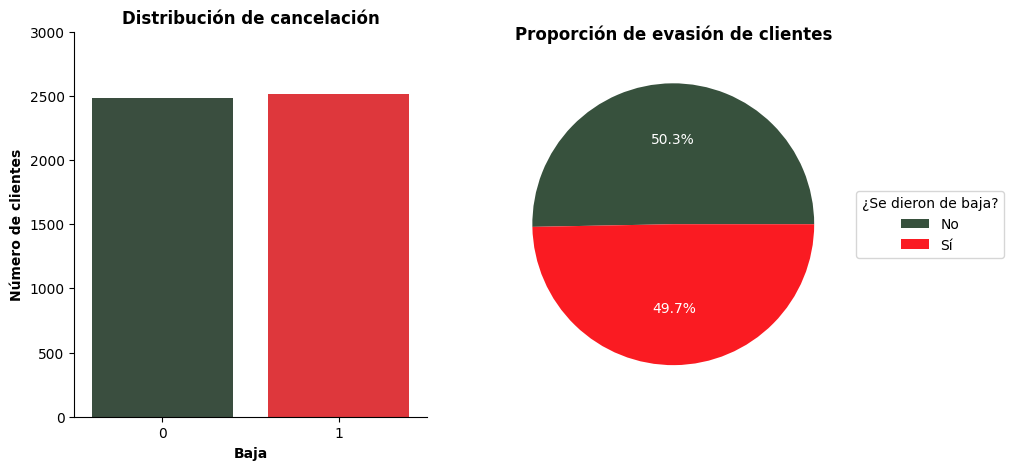

In [105]:
#Definir las etiquetas del eje x
etiquetas_baja = ['No', 'Sí']

fig, axs = plt.subplots(1, 2, figsize=(10,5))

#Gráfico de barras de la variable churn
sns.countplot(ax=axs[0], data=df,
              x=df['churned'],
              hue=df['churned'],
              palette=colores,
              legend=False)

axs[0].set_title('Distribución de cancelación', fontsize=12, fontweight='bold')
axs[0].set_xlabel('Baja', fontsize=10, fontweight='bold')
axs[0].set_ylabel('Número de clientes', fontsize=10, fontweight='bold')
axs[0].set_ylim(0, 3000)
axs[0].spines[['top', 'right']].set_visible(False)

#Gráfico de torta de la variable churn
axs[1].pie(proporcion_churn,
           labels=etiquetas_baja,
           colors=colores,
           autopct='%1.1f%%',
           textprops=dict(color="w"))

axs[1].set_title('Proporción de evasión de clientes', loc='center', fontsize=12, fontweight='bold')
axs[1].legend(title="¿Se dieron de baja?", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

#### Análisis explotatorio de las variables :
- Sexo.
- Suscripción.
- Región.
- Dispositivos.
- Método de pago.
- Género favorito.

In [106]:
#Lista con las variables categoricas sin churn
columnas_categoricas = list(df.select_dtypes('object'))
columnas_categoricas


['gender',
 'subscription_type',
 'region',
 'device',
 'payment_method',
 'favorite_genre']

In [107]:
columnas_categoricas

['gender',
 'subscription_type',
 'region',
 'device',
 'payment_method',
 'favorite_genre']

In [108]:
##### Tabla con la estadística descriptiva de las variables categóricas
tabla_categoricas = df[columnas_categoricas].describe()


In [109]:
tabla_categoricas

,gender,subscription_type,region,device,payment_method,favorite_genre
count,5000,5000,5000,5000,5000,5000
unique,3,3,6,5,5,7
top,Female,Premium,South America,Tablet,Debit Card,Drama
freq,1711,1693,873,1048,1030,731


In [111]:
#Calculo de tasa promedio global
baja_promedio_global = df['churned'].mean()

In [112]:
def tabla_categorica(df, col1, col2, normalize=False):
  """
  Función que retorna una tabla de contingencia entre las variables seleccionadas
  """
  tabla = pd.crosstab(df[col1], df[col2], normalize=normalize)
  tabla.reset_index(inplace=True)
  tabla.columns.name = ''
  return tabla

In [113]:

def graficos_categoricas(tabla1, tabla2, columna1, columna2='baja'):
  """
  Función que genera los gráficos de barras para las dos tablas de contingencia
  obtenidas para evaluar la relación entre las variables categóricas y objetivo
  """
  # --PREPARANDO LOS DATOS DE LA TABLA 1
  tabla_recuento = tabla1.melt(id_vars=columna1, var_name=columna2, value_name='conteo')

  fig, axs = plt.subplots(1, 2, figsize=(14, 7))

  # --- GRÁFICO 1: RECUENTO ---
  sns.barplot(ax=axs[0],
              data=tabla_recuento,
              x=columna1,
              y='conteo',
              hue=columna2,
              palette=colores)

  axs[0].set_title(f'Distribución de {columna2} por {columna1.capitalize()}', fontsize=12, fontweight='bold')
  axs[0].set_xlabel(columna1.capitalize(), fontweight='bold')
  axs[0].set_ylabel('Número de clientes', fontweight='bold')
  axs[0].set_ylim(0, tabla_recuento['conteo'].max() * 1.15)
  axs[0].yaxis.set_minor_locator(ticker.AutoMinorLocator())
  axs[0].spines[['top', 'right']].set_visible(False)

  # Obtenemos los 'handles' (los cuadraditos de colores) que Seaborn ya creó
  handles, _ = axs[0].get_legend_handles_labels()

  #Dibujamos la leyenda usando esos mismos colores pero nuevas etiquetas
  axs[0].legend(handles=handles, labels=['No', 'Si'], title='¿Abandonó?', ncols=2)

  # --- GRÁFICO 2: TASA ---
  # Graficamos la columna '1' que representa la tasa de abandono
  sns.barplot(ax=axs[1], data=tabla2, x=columna1, y=1, hue=columna1, palette='rocket')
  axs[1].set_title(f'Tasa de evasión por {columna1.capitalize()}', fontsize=12, fontweight='bold')
  axs[1].set_xlabel(columna1.capitalize(), fontweight='bold')
  axs[1].set_ylabel('Tasa de abandono (0 a 1)', fontweight='bold')
  axs[1].set_ylim(0, 1)
  axs[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())
  axs[1].spines[['top', 'right']].set_visible(False)

  # Añadimos una línea punteada con la tasa promedio de evasión global para referencia
  tasa_promedio = tabla2[1].mean()
  axs[1].axhline(baja_promedio_global, color='red', linestyle='--', alpha=0.6, label=f'Promedio ({tasa_promedio:.2f})')
  axs[1].legend()

  plt.tight_layout()
  plt.show()


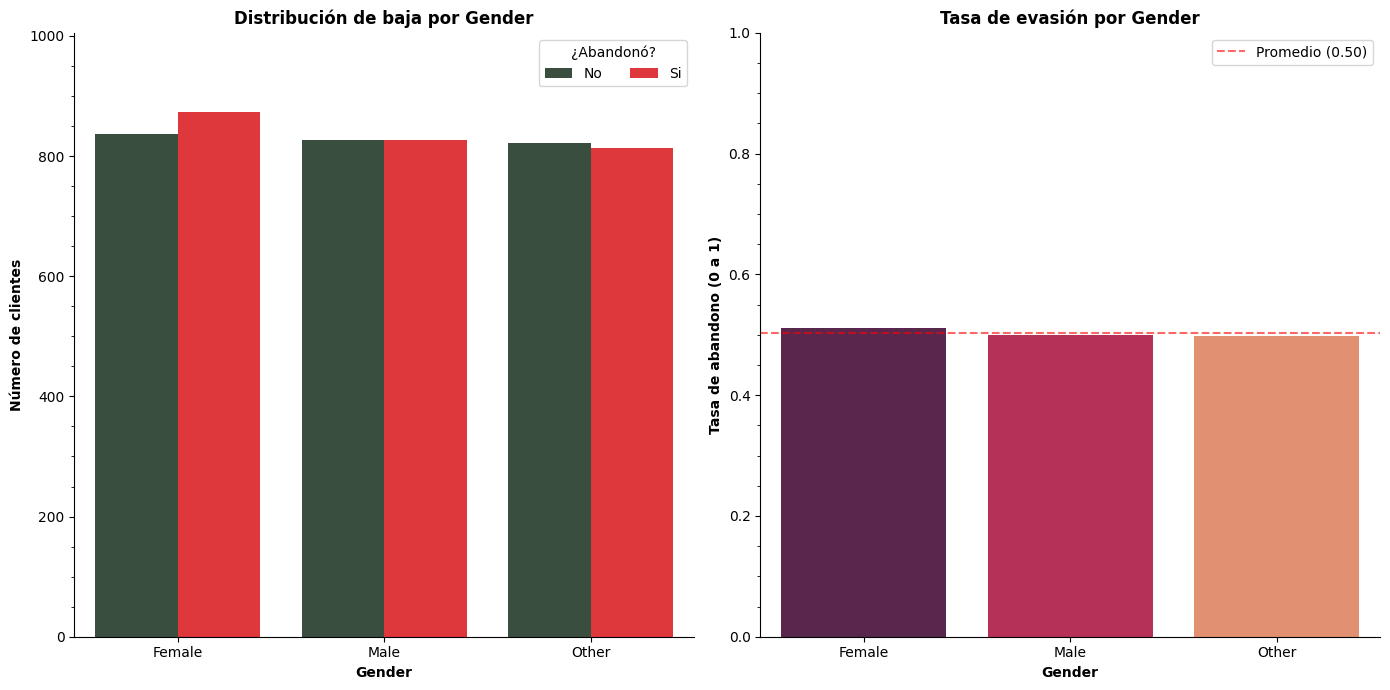

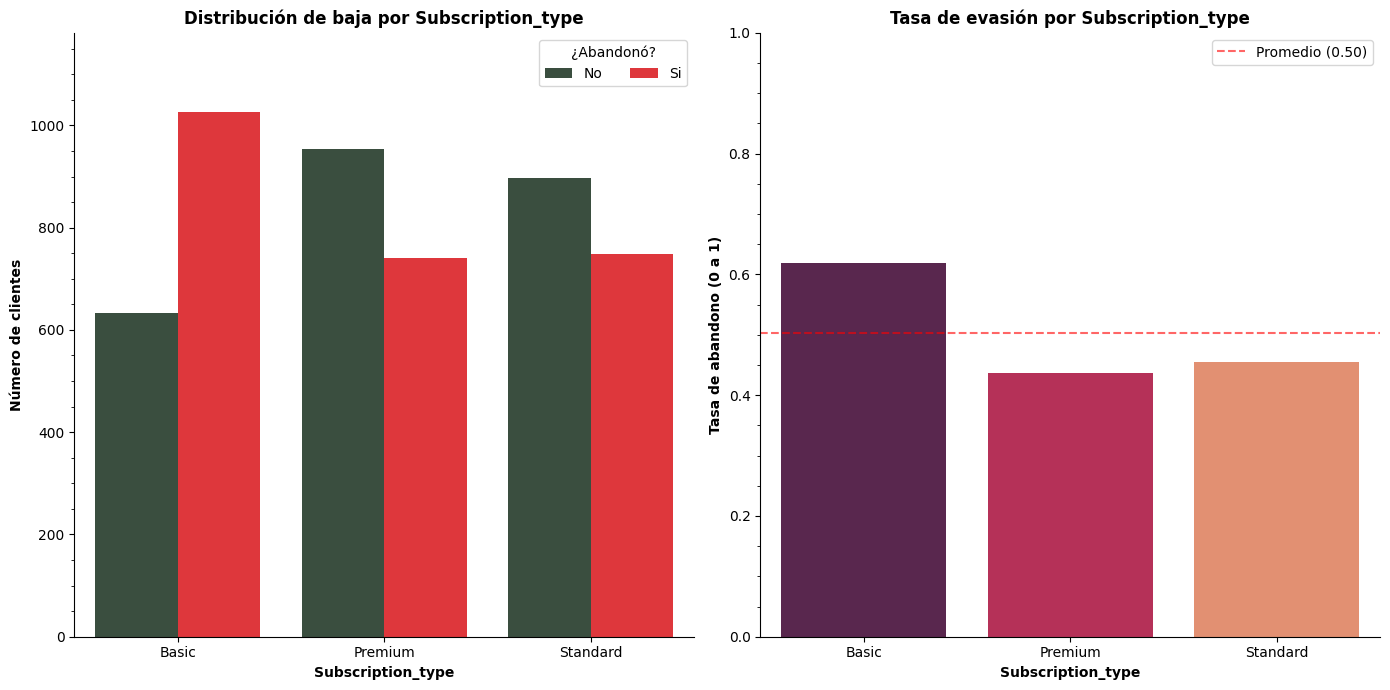

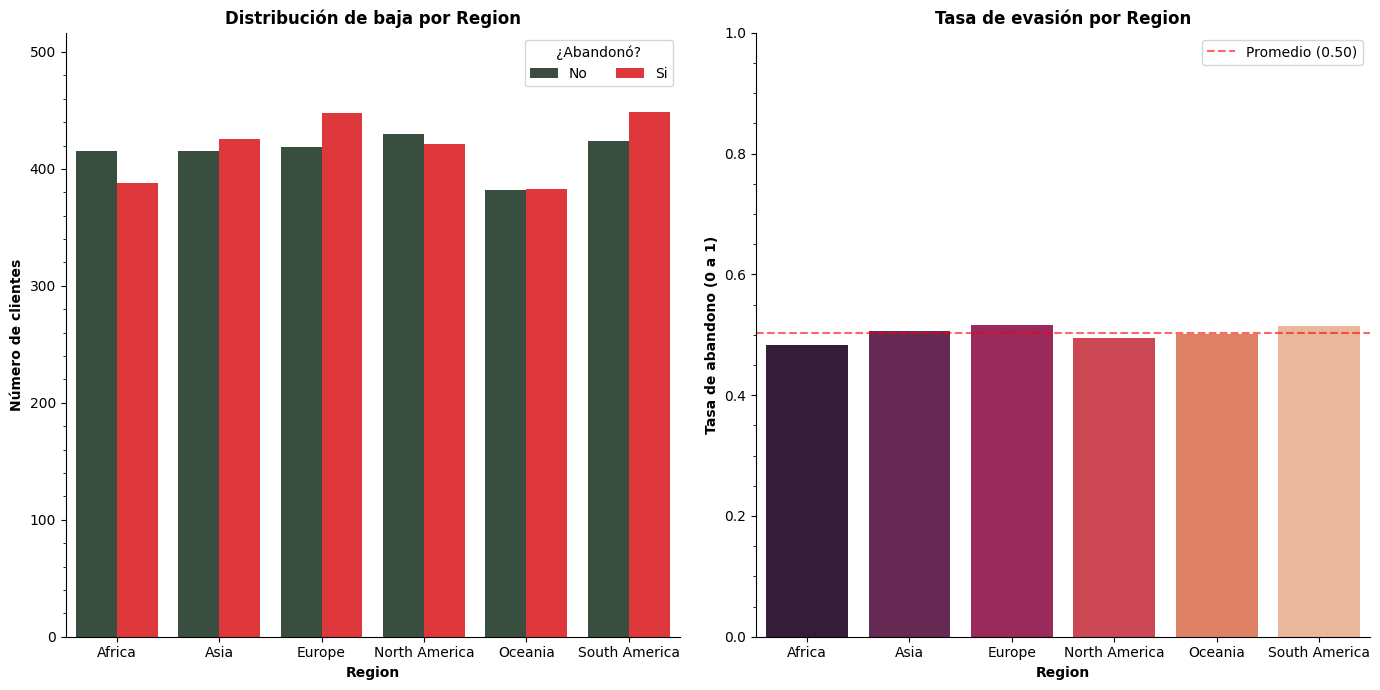

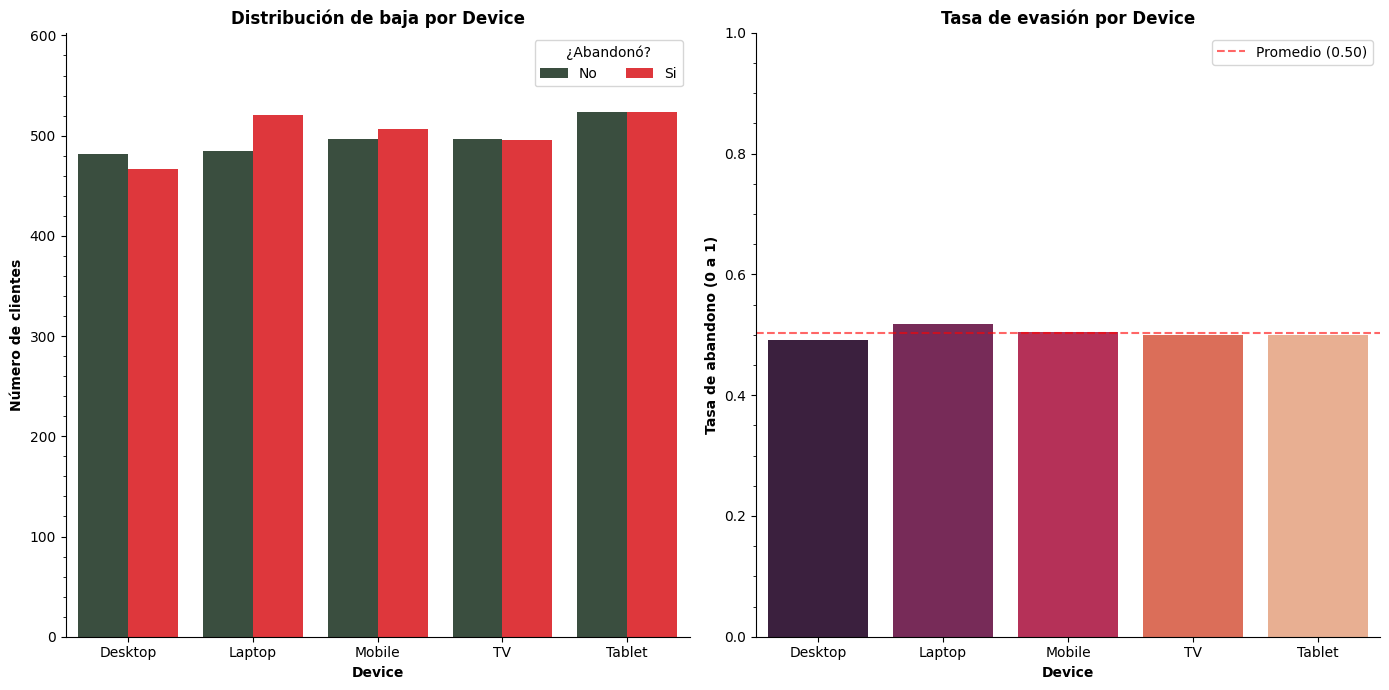

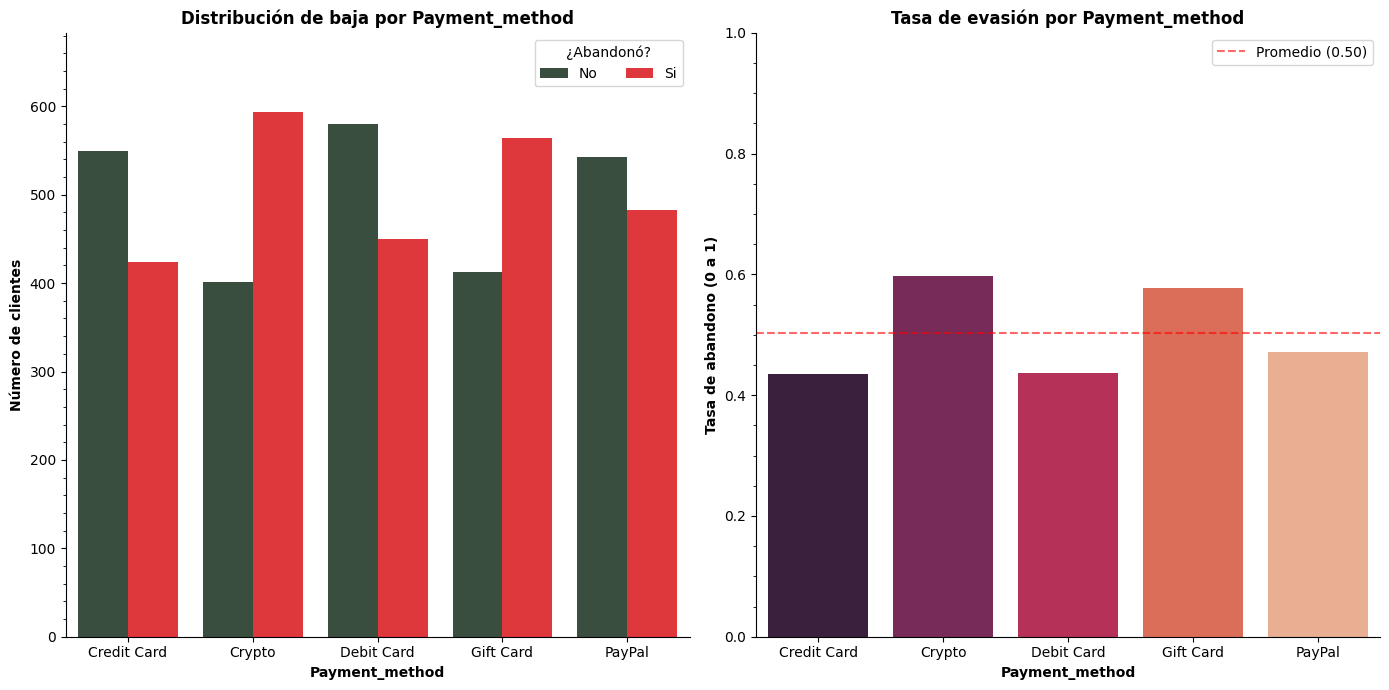

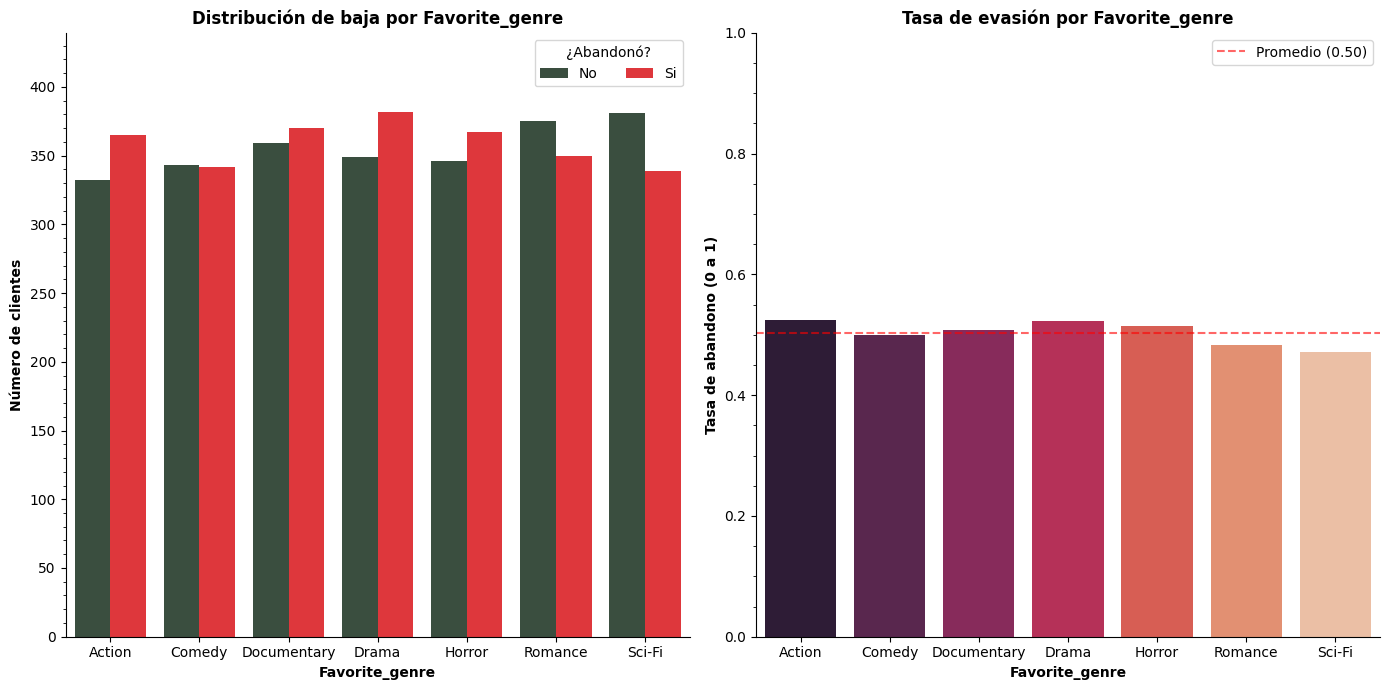

In [114]:
# Bucle que genera los gráficos de recuento de clientes que se dieron de baja
# y tasa de evasión de los clientes por categoría
for col in columnas_categoricas:
  tab_recuento = tabla_categorica(df, col, 'churned')
  tab_frecuencia = tabla_categorica(df, col, 'churned', normalize='index')

  graficos_categoricas(tab_recuento, tab_frecuencia, col)

##### Análisis de correlación

In [49]:
from scipy.stats import chi2_contingency

In [115]:
#Función que calcula el coeficiente v de cramer para analizar la correlación entre las variables categóricas
# y la variable cancelación
def calcular_v_cramer(conf_matrix):
    chi2 = chi2_contingency(conf_matrix)[0]
    n = conf_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = conf_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [116]:
#Bucle que calcula para cada columna categórica la correlación con la variable cancelación
for col in columnas_categoricas:
    tabla = pd.crosstab(df[col], df['churned'])
    chi2, p, dof, ex = chi2_contingency(tabla)
    v_cramer = calcular_v_cramer(tabla)

    print(f"Variable: {col}")
    print(f"P-valor: {p:.4f} ({'Significativo' if p < 0.05 else 'No significativo'})")
    print(f"V de Cramér: {v_cramer:.4f}")
    print("-" * 30)

Variable: gender
P-valor: 0.7225 (No significativo)
V de Cramér: 0.0000
------------------------------
Variable: subscription_type
P-valor: 0.0000 (Significativo)
V de Cramér: 0.1621
------------------------------
Variable: region
P-valor: 0.7531 (No significativo)
V de Cramér: 0.0000
------------------------------
Variable: device
P-valor: 0.8362 (No significativo)
V de Cramér: 0.0000
------------------------------
Variable: payment_method
P-valor: 0.0000 (Significativo)
V de Cramér: 0.1363
------------------------------
Variable: favorite_genre
P-valor: 0.3236 (No significativo)
V de Cramér: 0.0139
------------------------------


##### Averiguar si las variables subscripción y método de pago están relacionadas

In [117]:
#Tabla que contiene las frecuencias observadas de cada categoría
cruce = pd.crosstab(df['subscription_type'], df['payment_method'])

In [118]:
cruce

payment_method,Credit Card,Crypto,Debit Card,Gift Card,PayPal
subscription_type,,,,,
Basic,345,300,338,317,361
Premium,324,357,355,340,317
Standard,304,338,337,319,348


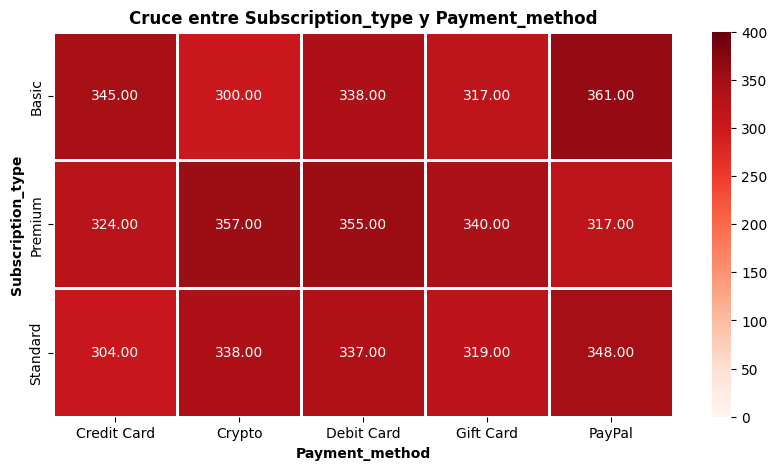

In [119]:
#Mapa de calor para observar las frecuencias por categoría
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.heatmap(cruce, vmin=0, vmax=400, annot=True, fmt=".2f", cmap='Reds', linewidths=.75)
ax.set_title(f'Cruce entre {cruce.index.name.capitalize()} y {cruce.columns.name.capitalize()}', fontsize=12, fontweight='bold')
ax.set_xlabel(f'{cruce.columns.name.capitalize()}', fontsize=10, fontweight='bold')
ax.set_ylabel(f'{cruce.index.name.capitalize()}', fontsize=10, fontweight='bold')

plt.show()

In [120]:
#Prueba de chi cuadrada entre las variables subscripción y método de pago
chi2, p, dof, ex = chi2_contingency(cruce)
print(f"Prueba de independencia entre {cruce.index.name} y {cruce.columns.name}")
print(f"Estadístico chi2: {chi2:.4f}, P-valor: {p:.4f} ({'Significativo' if p < 0.05 else 'No significativo'})")


Prueba de independencia entre subscription_type y payment_method
Estadístico chi2: 11.5316, P-valor: 0.1734 (No significativo)


## **Análisis Exploratorio de variables numéricas**

### Media de las variables númericas

In [ ]:
#Media de horas vistas de los que se van por perfil
yes_churn['watch_hour_per_profile'].mean()

np.float64(3.0411848906560635)

In [ ]:
#Media de horas vistas de los que se van
yes_churn['watch_hours'].mean()

np.float64(5.918497017892644)

In [ ]:
#Media de horas vistas de los que no se van
no_churn['watch_hours'].mean()

np.float64(17.449589537223343)

In [ ]:
# Media de horas vistas de los que no se van por perfil
no_churn['watch_hour_per_profile'].mean()

np.float64(7.421452716297786)

In [ ]:
#Media de los dias desde la ultima conexión  de los que se van
yes_churn['last_login_days'].mean()

np.float64(38.30934393638171)

In [ ]:
#Media de los dias desde la ultima conexión  de los no que se van
no_churn['last_login_days'].mean()

np.float64(21.77102615694165)

In [ ]:
#Media del pago mensual de los que se van
yes_churn['monthly_fee'].mean()

np.float64(13.125188866799201)

In [ ]:
#Media del pago mensual de los que no se van
no_churn['monthly_fee'].mean()

np.float64(14.24835010060362)

In [ ]:
#Media del número de perfiles de los que se van
yes_churn['number_of_profiles'].mean()

np.float64(2.801192842942346)

In [ ]:
#Media del número de perfiles de los que no se van
no_churn['number_of_profiles'].mean()

np.float64(3.2503018108651913)

In [ ]:
#Media del promedio de tiempo viendo Netflix por dia  de los que se van
yes_churn['avg_watch_time_per_day'].mean()

np.float64(0.16404771371769386)

In [ ]:
#Media del promedio de tiempo viendo Netflix por dia  de los que se van por perfil
yes_churn['avg_watch_time_per_day_profile'].mean()

np.float64(0.087662027833002)

In [ ]:
#Media del promedio de tiempo viendo Netflix por dia  de los que no se van
no_churn['avg_watch_time_per_day'].mean()

np.float64(1.5941327967806842)

In [ ]:
#Media del promedio de tiempo viendo Netflix por dia  de los que no se van por perfil
no_churn['avg_watch_time_per_day_profile'].mean()

np.float64(0.7162857142857144)

### Matriz de correlación

In [ ]:
df.columns

Index(['age', 'gender', 'subscription_type', 'watch_hours', 'last_login_days',
       'region', 'device', 'monthly_fee', 'churned', 'payment_method',
       'number_of_profiles', 'avg_watch_time_per_day', 'favorite_genre',
       'watch_hour_per_profile', 'avg_watch_time_per_day_profile'],
      dtype='object')

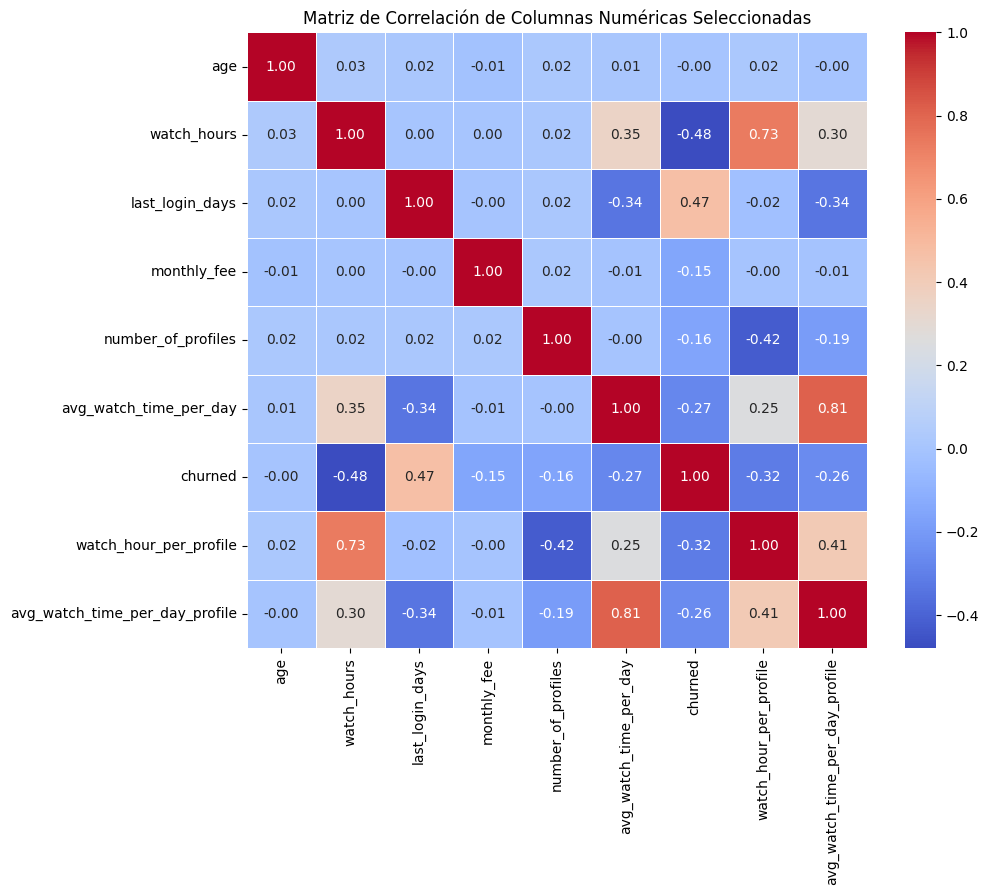

In [ ]:
# Crear una matriz de correlación para columnas numéricas seleccionadas
# Seleccionar algunas columnas numéricas para incluir en la matriz de correlación
numeric_cols = ['age','watch_hours', 'last_login_days', 'monthly_fee', 'number_of_profiles', 'avg_watch_time_per_day','churned','watch_hour_per_profile','avg_watch_time_per_day_profile']

# Calcular la matriz de correlación
correlation_matrix = df[numeric_cols].corr()

# Crear un mapa de calor (heatmap) para la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Columnas Numéricas Seleccionadas')
plt.show()

 Las variables 'watch_hours' y 'watch_hour_per_profile' muestran fuerte correlacion asi como ''avg_watch_time_per_day' y 'avg_watch_time_per_day_profile', porque 'watch_hour_per_profile' y 'avg_watch_time_per_day_profile' son derivadas de 'watch_hours' y 'watch_hour_per_profile'

### Gráficos

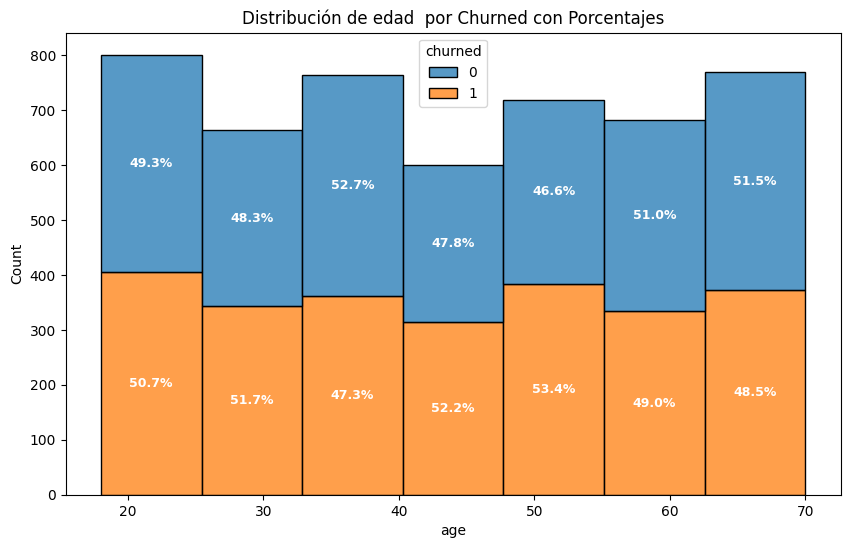

In [121]:
# Configuración del gráfico
plt.figure(figsize=(10, 6))

# 1. Generamos el gráfico y lo guardamos en la variable 'ax'
ax = sns.histplot(data=df, x='age', hue='churned', multiple='stack', bins=7)

# --- LÓGICA PARA AGREGAR PORCENTAJES ---

# Paso A: Calcular el total acumulado de cada barra (bin)
# Los 'containers' son los grupos de barras (uno por cada categoría de 'churned')
# Asumimos que todos tienen la misma cantidad de bins.
num_bins = len(ax.containers[0])
bin_totals = [0] * num_bins

# Sumamos la altura de cada segmento para saber el total de cada columna
for container in ax.containers:
    for i, bar in enumerate(container):
        bin_totals[i] += bar.get_height()

# Paso B: Calcular porcentajes y escribir el texto
for container in ax.containers:
    # container.get_label() te daría la etiqueta del grupo (hue) si la necesitas
    for i, bar in enumerate(container):
        height = bar.get_height()

        # Solo etiquetamos si la barra tiene altura (evita errores de división por cero o etiquetas vacías)
        if height > 0:
            percentage = (height / bin_totals[i]) * 100

            # Opcional: Solo mostrar texto si el segmento es lo suficientemente grande (ej. > 2%)
            # para evitar que el texto se encime en barras muy pequeñas.
            if percentage > 2:
                ax.text(
                    x=bar.get_x() + bar.get_width() / 2,  # Centro horizontal de la barra
                    y=bar.get_y() + height / 2,           # Centro vertical del segmento
                    s=f'{percentage:.1f}%',               # Texto con 1 decimal
                    ha='center',
                    va='center',
                    color='white',                        # Color blanco para resaltar sobre las barras
                    fontweight='bold',
                    fontsize=9
                )

plt.title('Distribución de edad  por Churned con Porcentajes')
plt.show()

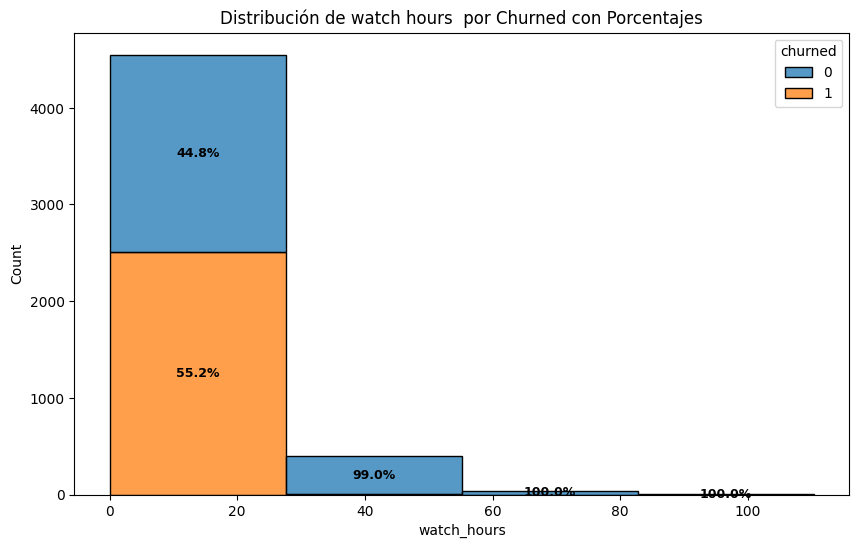

In [122]:
# Configuración del gráfico
plt.figure(figsize=(10, 6))

# 1. Generamos el gráfico y lo guardamos en la variable 'ax'
ax = sns.histplot(data=df, x='watch_hours', hue='churned', multiple='stack', bins=4)

# --- LÓGICA PARA AGREGAR PORCENTAJES ---

# Paso A: Calcular el total acumulado de cada barra (bin)
# Los 'containers' son los grupos de barras (uno por cada categoría de 'churned')
# Asumimos que todos tienen la misma cantidad de bins.
num_bins = len(ax.containers[0])
bin_totals = [0] * num_bins

# Sumamos la altura de cada segmento para saber el total de cada columna
for container in ax.containers:
    for i, bar in enumerate(container):
        bin_totals[i] += bar.get_height()

# Paso B: Calcular porcentajes y escribir el texto
for container in ax.containers:
    # container.get_label() te daría la etiqueta del grupo (hue) si la necesitas
    for i, bar in enumerate(container):
        height = bar.get_height()

        # Solo etiquetamos si la barra tiene altura (evita errores de división por cero o etiquetas vacías)
        if height > 0:
            percentage = (height / bin_totals[i]) * 100

            # Opcional: Solo mostrar texto si el segmento es lo suficientemente grande (ej. > 2%)
            # para evitar que el texto se encime en barras muy pequeñas.
            if percentage > 2:
                ax.text(
                    x=bar.get_x() + bar.get_width() / 2,  # Centro horizontal de la barra
                    y=bar.get_y() + height / 2,           # Centro vertical del segmento
                    s=f'{percentage:.1f}%',               # Texto con 1 decimal
                    ha='center',
                    va='center',
                    color='black',                        # Color negro para resaltar sobre las barras
                    fontweight='bold',
                    fontsize=9
                )

plt.title('Distribución de watch hours  por Churned con Porcentajes')
plt.show()

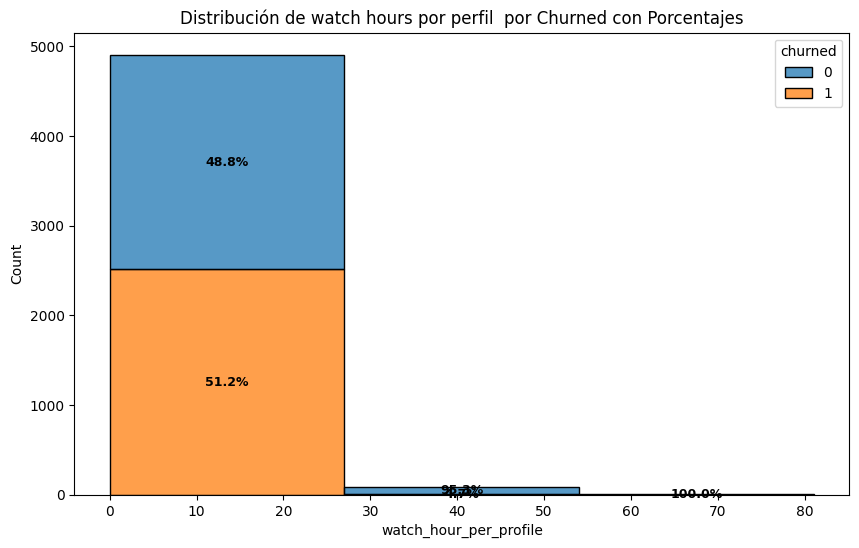

In [46]:
# Configuración del gráfico
plt.figure(figsize=(10, 6))

# 1. Generamos el gráfico y lo guardamos en la variable 'ax'
ax = sns.histplot(data=df, x='watch_hour_per_profile', hue='churned', multiple='stack', bins=3)

# --- LÓGICA PARA AGREGAR PORCENTAJES ---

# Paso A: Calcular el total acumulado de cada barra (bin)
# Los 'containers' son los grupos de barras (uno por cada categoría de 'churned')
# Asumimos que todos tienen la misma cantidad de bins.
num_bins = len(ax.containers[0])
bin_totals = [0] * num_bins

# Sumamos la altura de cada segmento para saber el total de cada columna
for container in ax.containers:
    for i, bar in enumerate(container):
        bin_totals[i] += bar.get_height()

# Paso B: Calcular porcentajes y escribir el texto
for container in ax.containers:
    # container.get_label() te daría la etiqueta del grupo (hue) si la necesitas
    for i, bar in enumerate(container):
        height = bar.get_height()

        # Solo etiquetamos si la barra tiene altura (evita errores de división por cero o etiquetas vacías)
        if height > 0:
            percentage = (height / bin_totals[i]) * 100

            # Opcional: Solo mostrar texto si el segmento es lo suficientemente grande (ej. > 2%)
            # para evitar que el texto se encime en barras muy pequeñas.
            if percentage > 2:
                ax.text(
                    x=bar.get_x() + bar.get_width() / 2,  # Centro horizontal de la barra
                    y=bar.get_y() + height / 2,           # Centro vertical del segmento
                    s=f'{percentage:.1f}%',               # Texto con 1 decimal
                    ha='center',
                    va='center',
                    color='black',                        # Color negro para resaltar sobre las barras
                    fontweight='bold',
                    fontsize=9
                )

plt.title('Distribución de watch hours por perfil  por Churned con Porcentajes')
plt.show()

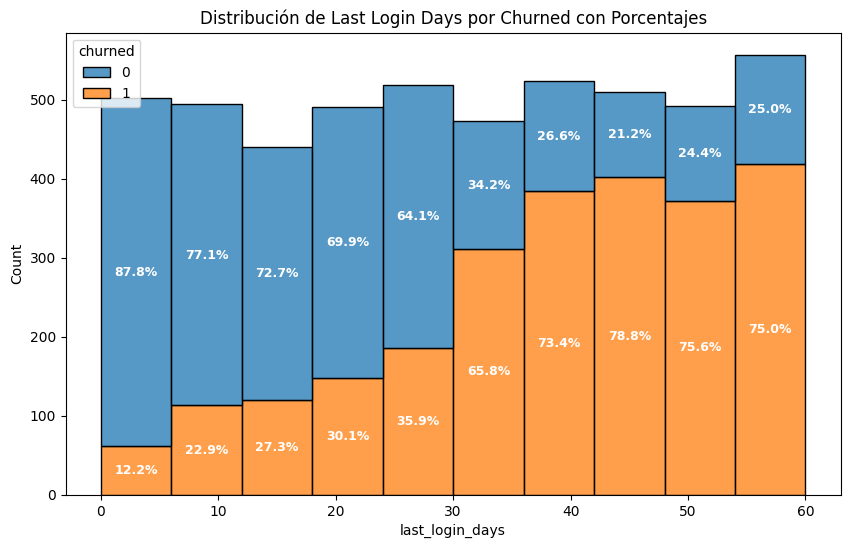

In [123]:

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# 1. Generamos el gráfico y lo guardamos en la variable 'ax'
ax = sns.histplot(data=df, x='last_login_days', hue='churned', multiple='stack', bins=10)

# --- LÓGICA PARA AGREGAR PORCENTAJES ---

# Paso A: Calcular el total acumulado de cada barra (bin)
# Los 'containers' son los grupos de barras (uno por cada categoría de 'churned')
# Asumimos que todos tienen la misma cantidad de bins.
num_bins = len(ax.containers[0])
bin_totals = [0] * num_bins

# Sumamos la altura de cada segmento para saber el total de cada columna
for container in ax.containers:
    for i, bar in enumerate(container):
        bin_totals[i] += bar.get_height()

# Paso B: Calcular porcentajes y escribir el texto
for container in ax.containers:
    # container.get_label() te daría la etiqueta del grupo (hue) si la necesitas
    for i, bar in enumerate(container):
        height = bar.get_height()

        # Solo etiquetamos si la barra tiene altura (evita errores de división por cero o etiquetas vacías)
        if height > 0:
            percentage = (height / bin_totals[i]) * 100

            # Opcional: Solo mostrar texto si el segmento es lo suficientemente grande (ej. > 2%)
            # para evitar que el texto se encime en barras muy pequeñas.
            if percentage > 2:
                ax.text(
                    x=bar.get_x() + bar.get_width() / 2,  # Centro horizontal de la barra
                    y=bar.get_y() + height / 2,           # Centro vertical del segmento
                    s=f'{percentage:.1f}%',               # Texto con 1 decimal
                    ha='center',
                    va='center',
                    color='white',                        # Color blanco para resaltar sobre las barras
                    fontweight='bold',
                    fontsize=9
                )

plt.title('Distribución de Last Login Days por Churned con Porcentajes')
plt.show()


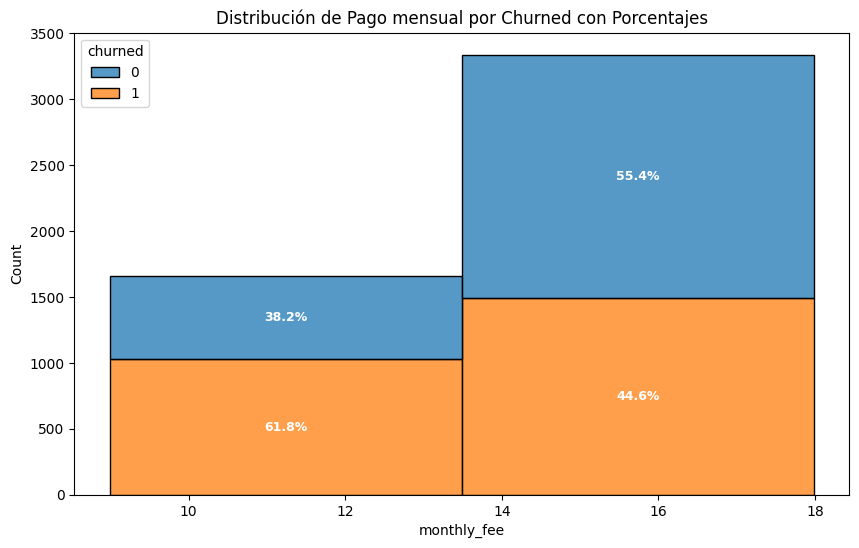

In [124]:

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# 1. Generamos el gráfico y lo guardamos en la variable 'ax'
ax = sns.histplot(data=df, x='monthly_fee', hue='churned', multiple='stack', bins=2)

# --- LÓGICA PARA AGREGAR PORCENTAJES ---

# Paso A: Calcular el total acumulado de cada barra (bin)
# Los 'containers' son los grupos de barras (uno por cada categoría de 'churned')
# Asumimos que todos tienen la misma cantidad de bins.
num_bins = len(ax.containers[0])
bin_totals = [0] * num_bins

# Sumamos la altura de cada segmento para saber el total de cada columna
for container in ax.containers:
    for i, bar in enumerate(container):
        bin_totals[i] += bar.get_height()

# Paso B: Calcular porcentajes y escribir el texto
for container in ax.containers:
    # container.get_label() te daría la etiqueta del grupo (hue) si la necesitas
    for i, bar in enumerate(container):
        height = bar.get_height()

        # Solo etiquetamos si la barra tiene altura (evita errores de división por cero o etiquetas vacías)
        if height > 0:
            percentage = (height / bin_totals[i]) * 100

            # Opcional: Solo mostrar texto si el segmento es lo suficientemente grande (ej. > 2%)
            # para evitar que el texto se encime en barras muy pequeñas.
            if percentage > 2:
                ax.text(
                    x=bar.get_x() + bar.get_width() / 2,  # Centro horizontal de la barra
                    y=bar.get_y() + height / 2,           # Centro vertical del segmento
                    s=f'{percentage:.1f}%',               # Texto con 1 decimal
                    ha='center',
                    va='center',
                    color='white',                        # Color blanco para resaltar sobre las barras
                    fontweight='bold',
                    fontsize=9
                )

plt.title('Distribución de Pago mensual por Churned con Porcentajes')
plt.show()


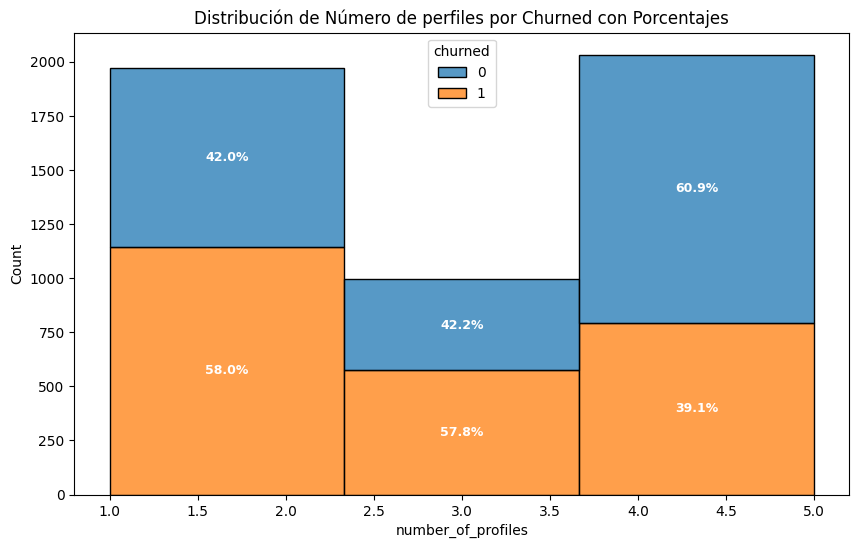

In [125]:

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# 1. Generamos el gráfico y lo guardamos en la variable 'ax'
ax = sns.histplot(data=df, x='number_of_profiles', hue='churned', multiple='stack', bins=3)

# --- LÓGICA PARA AGREGAR PORCENTAJES ---

# Paso A: Calcular el total acumulado de cada barra (bin)
# Los 'containers' son los grupos de barras (uno por cada categoría de 'churned')
# Asumimos que todos tienen la misma cantidad de bins.
num_bins = len(ax.containers[0])
bin_totals = [0] * num_bins

# Sumamos la altura de cada segmento para saber el total de cada columna
for container in ax.containers:
    for i, bar in enumerate(container):
        bin_totals[i] += bar.get_height()

# Paso B: Calcular porcentajes y escribir el texto
for container in ax.containers:
    # container.get_label() te daría la etiqueta del grupo (hue) si la necesitas
    for i, bar in enumerate(container):
        height = bar.get_height()

        # Solo etiquetamos si la barra tiene altura (evita errores de división por cero o etiquetas vacías)
        if height > 0:
            percentage = (height / bin_totals[i]) * 100

            # Opcional: Solo mostrar texto si el segmento es lo suficientemente grande (ej. > 2%)
            # para evitar que el texto se encime en barras muy pequeñas.
            if percentage > 2:
                ax.text(
                    x=bar.get_x() + bar.get_width() / 2,  # Centro horizontal de la barra
                    y=bar.get_y() + height / 2,           # Centro vertical del segmento
                    s=f'{percentage:.1f}%',               # Texto con 1 decimal
                    ha='center',
                    va='center',
                    color='white',                        # Color blanco para resaltar sobre las barras
                    fontweight='bold',
                    fontsize=9
                )

plt.title('Distribución de Número de perfiles por Churned con Porcentajes')
plt.show()


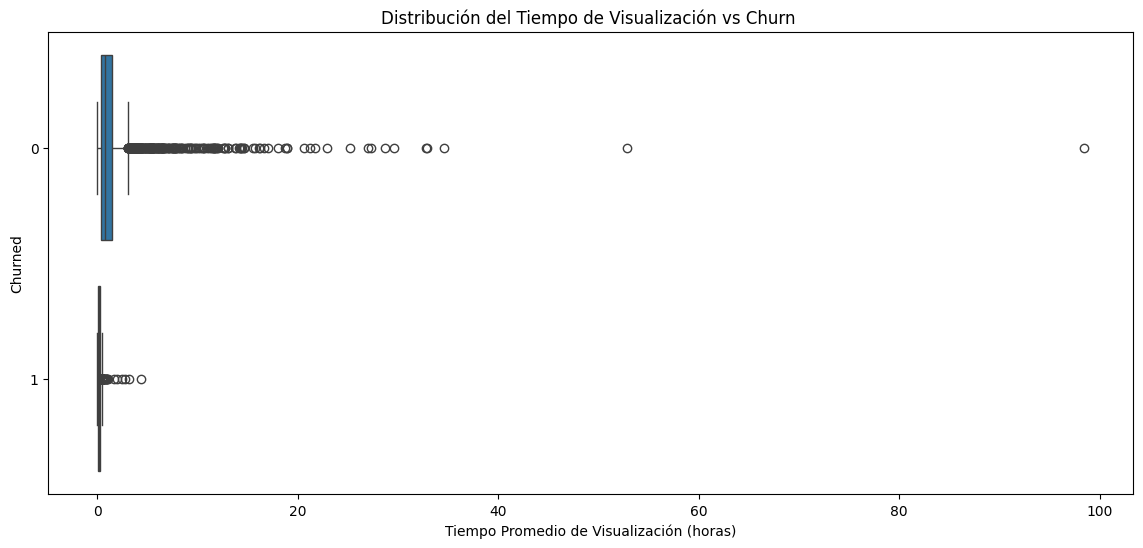

In [67]:

# 1. Configurar el tamaño (escala) de la figura.
# (12, 6) significa 12 pulgadas de ancho por 6 de alto.
plt.figure(figsize=(14, 6))

# 2. Crear el Boxplot Horizontal
# Notar que 'x' ahora tiene la variable numérica y 'y' la categórica
sns.boxplot(x='avg_watch_time_per_day', y='churned', data=df, orient='h')

# Opcional: Agregar títulos y etiquetas para mayor claridad
plt.title('Distribución del Tiempo de Visualización vs Churn ')
plt.xlabel('Tiempo Promedio de Visualización (horas)')
plt.ylabel('Churned')

plt.show()


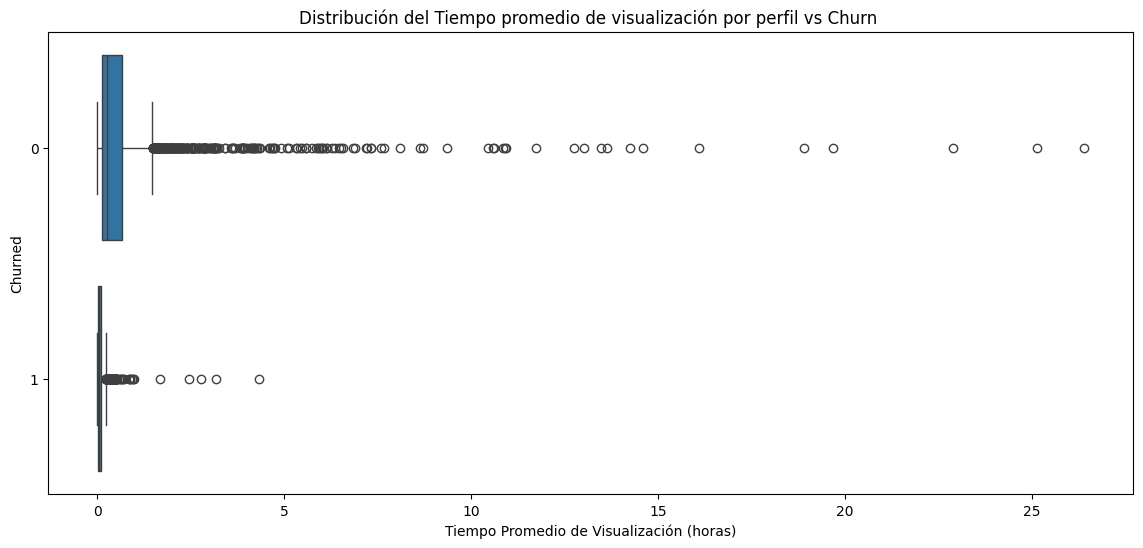

In [66]:

# 1. Configurar el tamaño (escala) de la figura.
# (12, 6) significa 12 pulgadas de ancho por 6 de alto.
plt.figure(figsize=(14, 6))

# 2. Crear el Boxplot Horizontal
# Notar que 'x' ahora tiene la variable numérica y 'y' la categórica
sns.boxplot(x='avg_watch_time_per_day_profile', y='churned', data=df, orient='h')

# Opcional: Agregar títulos y etiquetas para mayor claridad
plt.title('Distribución del Tiempo promedio de visualización por perfil vs Churn ')
plt.xlabel('Tiempo Promedio de Visualización (horas)')
plt.ylabel('Churned')

plt.show()

### **Conclusión del análisis exploratorio**

Solo se trabajará el modelo con 7 variables adicionales a 'churned', que son las que impactan la predicción, estas son: 

- Subscription_type. 
- Payment_method". 
- Watch_hours
- Last_login_days
- Monthly_fee.
- Number_of_profiles.
- Avg_watch_time_per_day.

### **Guardar las columnas para el desarrollo del modelo predictivo**

In [75]:
df_model = df.drop(columns=['age', 'gender', 'region', 'device', 'favorite_genre','watch_hour_per_profile','avg_watch_time_per_day_profile'], axis=1)

In [76]:
df_model.sample(5)

,subscription_type,watch_hours,last_login_days,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day
3291,Standard,15.37,34,13.99,0,PayPal,5,0.44
79,Standard,9.52,51,13.99,1,PayPal,1,0.18
3017,Premium,7.02,44,17.99,1,Gift Card,5,0.16
1218,Standard,24.23,52,13.99,0,Gift Card,2,0.46
1988,Premium,8.09,54,17.99,1,PayPal,2,0.15


In [77]:
# Guardar el DataFrame en un archivo CSV
df_model.to_csv('df_model.csv', index=False)